In [1]:
# Python built-in modules
import sys
from collections import Counter

# %pip install pandas
import pandas as pd

# %pip install numpy
import numpy as np

# %pip install textblob
from textblob import TextBlob

# %pip install nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# %pip install scipy
from scipy.spatial.distance import cosine

# %pip install matplotlib
import matplotlib.pyplot as plt

In [2]:
reviews_df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')
print(reviews_df)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [3]:
""" 1.
Use initially textblob implementation of sentiment, which provides a three-class output (positive, negative and neutral
sentiment polarity). Assuming that both neutral and negative sentiment score are cast as part of “dislike” category or
“0” and positive sentiment is cast in “1”, compute Pearson correlation between this constructed sentiment polarity and
the annotation.
"""

review_column = reviews_df["Review"]
liked_column = reviews_df["Liked"]

textblob_sentiments = []

for row in review_column:
    blob = TextBlob(row)
    polarity = blob.sentiment.polarity

    # Negative and neutral polarity is cast as "dislike" (0)
    sentiment_cast = 0
    # Positive polarity is cast as "like" (1)
    if polarity > 0:
        sentiment_cast = 1

    textblob_sentiments.append(sentiment_cast)

pearson_corr_coeff = np.corrcoef(textblob_sentiments, liked_column)
print("Pearson correlation coefficient matrix:\n", pearson_corr_coeff)
print("\nPearson correlation between textblob sentiment and review liked score:\n", pearson_corr_coeff[1][0])

Pearson correlation coefficient matrix:
 [[1.         0.54821494]
 [0.54821494 1.        ]]

Pearson correlation between textblob sentiment and review liked score:
 0.5482149423943888


In [4]:
""" 2.
Repeat 1) when using the cosine similarity measure. Repeat this process when considering the correlation of the positive
class alone and the correlation of the negative class alone.
"""

# Calculate overall coseine similarity
cosine_similarity = cosine(textblob_sentiments, liked_column)
print("Overall cosine similarity:", cosine_similarity)


# Calculate cosine similarity of positive class alone
positive_textblob_sentiments = []
positive_corresponding_liked_column = []

for index, rating in enumerate(textblob_sentiments):
    if rating == 1:
        positive_textblob_sentiments.append(textblob_sentiments[index])
        positive_corresponding_liked_column.append(liked_column[index])

positive_cosine_similarity = cosine(positive_textblob_sentiments, positive_corresponding_liked_column)
print("Positive cosine similarity:", positive_cosine_similarity)


# Calculate cosine similarity of negative class alone
negative_textblob_sentiments = []
negative_corresponding_liked_column = []

for index, rating in enumerate(textblob_sentiments):
    if rating == 0:
        negative_textblob_sentiments.append(textblob_sentiments[index])
        negative_corresponding_liked_column.append(liked_column[index])

# Undefined, division with 0 happens when one of the vectors of cosine similarity is all zeroes
negative_cosine_similarity = cosine(negative_textblob_sentiments, negative_corresponding_liked_column)
print("Negative cosine similarity:", negative_cosine_similarity)

Overall cosine similarity: 0.22280560449481546
Positive cosine similarity: 0.12447903224391887
Negative cosine similarity: 0


c:\Python310\lib\site-packages\scipy\spatial\distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [5]:
""" 3.
Now we want to test the correlation with respect to some stylistic aspects of the review. Write a script that estimate
the length of the review in terms of number of characters. Compute both the Pearson correlation and the cosine similarity
between the Review length and the annotations.
"""

# Add review_length column to dataframe
reviews_df['Length'] = reviews_df['Review'].str.len()
review_length_column = reviews_df["Length"]
print("Length column added to the dataframe:\n")
print(reviews_df, "\n\n")

# Calculate Pearson correlation between review length and review liked score
pearson_corr_coeff_length = np.corrcoef(review_length_column, liked_column)
print("Pearson correlation between review length and review liked score:\n", pearson_corr_coeff_length[1][0])

# Calculate cosine similarity between review length and review liked score
cosine_similarity_length = cosine(review_length_column, liked_column)
print("\nCosine similarity between review length and review liked score:\n", cosine_similarity_length)

Length column added to the dataframe:

                                                Review  Liked  Length
0                             Wow... Loved this place.      1      24
1                                   Crust is not good.      0      18
2            Not tasty and the texture was just nasty.      0      41
3    Stopped by during the late May bank holiday of...      1      87
4    The selection on the menu was great and so wer...      1      59
..                                                 ...    ...     ...
995  I think food should have flavor and texture an...      0      66
996                           Appetite instantly gone.      0      24
997  Overall I was not impressed and would not go b...      0      50
998  The whole experience was underwhelming, and I ...      0      91
999  Then, as if I hadn't wasted enough of my life ...      0     134

[1000 rows x 3 columns] 


Pearson correlation between review length and review liked score:
 -0.07528475029141278

Cosi

In [ ]:
""" 4.
We want to test the hypothesis that the opinion of about the restaurant is constructed according to Price, Quality of
food, Quantity of the food, and location of restaurant. Suggest a script that allows you to identify Review that are
more focused on price, quality of food, quantity of food and location of restaurant. You may consider a set of keywords
that are most suitable to each category and then use simple string matching to match this effect. For each category,
generate a binary vector indicating whether the given review focuses on the corresponding category.
"""

In [ ]:
""" 5.
Estimate the correlation using Pearson correlation and cosine similarity between each vector category and the data annotation.
"""

In [ ]:
""" 6.
We want to revisit the construction of the categories in 4). Instead of string matching, use the semantic similarity in
the following way. Calculate the Wu and Palmer similarity between “price” and the Review (using the sentence-to-sentence
similarity as in labs), repeat this process for the other three categories by suggestion a representative keyword (s)
that will be used to calculate sentence-to-sentence similarity score.
"""

In [ ]:
""" 7.
We want to test another approach for computing the categories by using the empath categories embedding. For this
purpose, re-visit the naming of the empath-categories in GitHub - Ejhfast/empath- client: analyze text with empath and
select those that might be linked to Price, Quality, Quantity, Location. Write a code that allows you to determine
appropriate categories from this embedding and then calculate the correlation score. Alternative to manual scrutinization
of the Empath categories, you may also generate an empath category embedding for the keyword “price”, “food quality”,
“food quantity”, “location” and then compute cosine similarity between the Review embedding vector and each of the above
four embedding vectors, so that the one that yields the highest similarity score will be considered as the one that best
represents the underlined category.
"""

In [ ]:
""" 8.
Repeat the 1-7) when using SentiStrength sentiment analyzer instead of textblob.
The package is available from sentistrength.wlv.ac.uk.
"""

Number of misclassified ratings:
226 

Number of word tokens after preprocessing:
1295 

Word tokens after preprocessing (print truncated to first 50 elements):
['honeslty', 'taste', 'fresh', 'try', 'cape', 'cod', 'ravoli', 'chicken', 'cranberry', 'mmmm', 'perform', 'take', 'hour', 'get', 'food', 'table', 'restaurant', 'food', 'luke', 'warm', 'sever', 'run', 'around', 'like', 'totally', 'overwhelm', 'find', 'place', 'accident', 'could', 'happier', 'seem', 'like', 'good', 'quick', 'place', 'grab', 'bite', 'familiar', 'pub', 'food', 'favor', 'look', 'elsewhere', 'overall', 'like', 'place', 'lot', 'shrimp', 'tender'] 

Histogram of the 10 most common words:


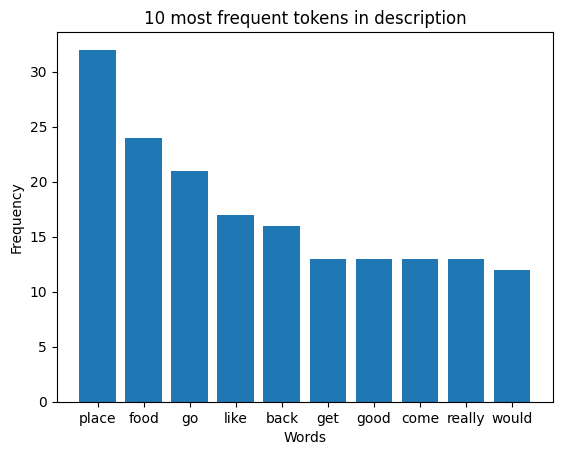

In [6]:
""" 9.
We want to further emphasize on misclassified reviews. For this purpose, concatenate all reviews for which the
sentiment score is positive while the annotation is zero and those for which the sentiment is zero while the annotation
is 1. Construct the Wordcloud of this dataset. Write a histogram showing the 10 most common wordings in this dataset.
Comment on the findings.
"""


# Collect misclassified ratings
misclassified_reviews = []

for index, row in enumerate(review_column):
    blob = TextBlob(row)
    polarity = blob.sentiment.polarity

    # Negative and neutral polarity is cast as "dislike" (0)
    sentiment_cast = 0
    # Positive polarity is cast as "like" (1)
    if polarity > 0:
        sentiment_cast = 1

    if sentiment_cast != liked_column[index]:
        misclassified_reviews.append(row)

print("Number of misclassified ratings:")
print(len(misclassified_reviews), "\n")


# Preprocessing
def pre_process(doc_string):
    stopwords = list(set(nltk.corpus.stopwords.words('english')))
    sentences = sent_tokenize(doc_string)
    tokens = []

    for sentence in sentences:
        words = word_tokenize(sentence.lower())

        # TODO Do we want stemming?
        # words = [SnowballStemmer("english").stem(word) for word in words]

        # TODO lots of misspelled words -> misspelling correction?

        words = [WordNetLemmatizer().lemmatize(word, pos="v") for word in words]

        # Leave out numbers and stopwords
        words = [
            word for word in words
            if word.isalpha()
            and word not in stopwords
        ]
        tokens.extend(words)

    return tokens


misclassified_reviews_preprocessed = pre_process(' '.join(misclassified_reviews))

print("Number of word tokens after preprocessing:")
print(len(misclassified_reviews_preprocessed), "\n")

print("Word tokens after preprocessing (print truncated to first 50 elements):")
print(misclassified_reviews_preprocessed[:50], "\n")

np.array(misclassified_reviews_preprocessed)


# Collect 10 most common words
most_common_words = Counter(" ".join(misclassified_reviews_preprocessed).split()).most_common(10)

# Parse the generated tuples into two different arrays
words = [word for word, _ in most_common_words]
counts = [counts for _, counts in most_common_words]

# Plot the words and their frequency
print("Histogram of the 10 most common words:")
plt.bar(words, counts)
plt.title("10 most frequent tokens in description")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()



# TODO word cloud




In [ ]:
""" 10.
Now we would like to build a machine learning model for sentiment analysis that takes into account the ambiguous cases
identified in 9). For this purpose, write and script and review the preprocessing and stopword list to not discard
relevant information in the context of sentiment analysis (e.g., avoid discarding negation cues, adjectives that
subsumes polarity and apostrophes, lower-case as capitalization brings emotion,..), then use TfIdfVectorizer with a
maximum feature set of 1000, minimum 2 repetition and no more than 60% of word repetition across sentences. Build this
model for one dataset using randomly selected 70% training and 30% testing. Report the classification accuracy.
"""

In [ ]:
""" 11.
Use FastText encoding instead of TfidfVectorizer, see https://github.com/facebookresearch/fastText/archive/v0.2.0.zip
You should install Fasttext and consult one of the tutorial to find out how you will run it, see, e.g., FastText Word
Embeddings Python implementation - ThinkInfi. Use the FastText embedding as feature vectors and test the performance
in the original data (30% test data) and report the classification accuracy on the other two datasets. Comment on the
limitations of the approach
"""